In [5]:
from mp_api.client import MPRester
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"
try:


    with MPRester(API_KEY) as mpr:
        # Query for Li-based cathode materials with high energy density
        docs = mpr.materials.insertion_electrodes.search(
            working_ion="Li",
            fields=[
                "battery_id", "formula_discharge", "average_voltage"
                , "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge", "fracA_charge", "stability_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"
            ]
        )

        # Convert to pandas for research analysis
        import pandas as pd
        df = pd.DataFrame([doc.dict() for doc in docs])
        print(df)

except Exception as e:
    print(f"An error occurred: {e}")

Retrieving InsertionElectrodeDoc documents: 100%|██████████| 2774/2774 [00:00<00:00, 4696.47it/s] 

      max_delta_volume  average_voltage  capacity_grav  capacity_vol  \
0             2.951183        -0.444846     499.595769   1295.168213   
1             1.569237         1.015953     563.913254   1890.293779   
2             0.025414         0.084405     339.236925    734.096706   
3             0.009450        -0.362516      26.936090     69.584747   
4             0.368255         0.796796     124.126099    923.538664   
...                ...              ...            ...           ...   
2769          0.076598        -0.048828     154.156419    464.317103   
2770          0.017783         0.617592      78.443276    248.149199   
2771          0.045934        -2.235023      79.582055    248.961487   
2772          0.017284        -1.876176      79.337012    251.710728   
2773          0.071513         0.911354      32.700641    215.914032   

      energy_grav   energy_vol  fracA_charge  fracA_discharge  \
0     -222.242937  -576.149771      0.000000         0.750000   
1    

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering (update with your actual column names)
features = ['average_voltage', "capacity_grav"]
# Step 1:
X_custom = df[features].values
# Scale the data (crucial for KMeans/DBSCAN)
X = StandardScaler().fit_transform(X_custom)

print("Data ready for clustering.")

Data ready for clustering.


In [14]:

# Step 2:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6)
plt.title("Original Data Distribution")
plt.xlabel("Average Voltage")
plt.ylabel("Gravimetric Energy Capacity")
plt.grid(True)
plt.show()

ImportError: Numba needs NumPy 2.3 or less. Got NumPy 2.4.

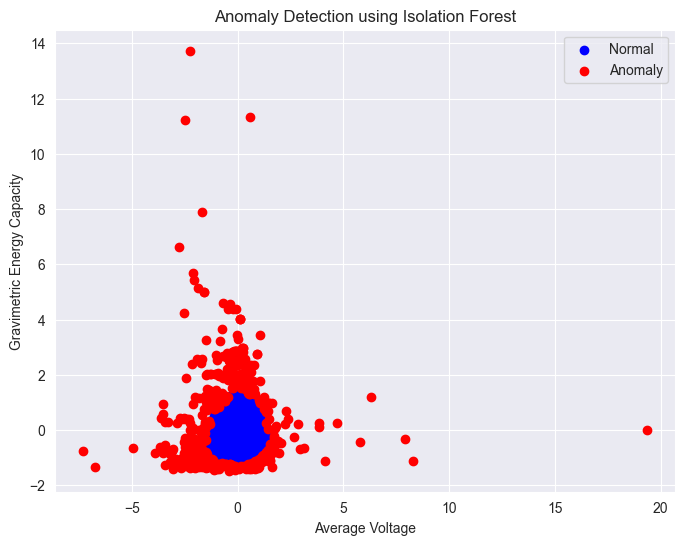

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Generate synthetic data
#
# normal_data = df[]  # normal points
# anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))    # anomalies
data = np.vstack(X)

# Step 2: Train Isolation Forest
model = IsolationForest(contamination=0.2)  # assume 10% anomalies
model.fit(data)

# Step 3: Predict anomalies
predictions = model.predict(data)  # -1 = anomaly, 1 = normal

# Step 4: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(data[predictions == 1][:, 0], data[predictions == 1][:, 1], c='blue', label='Normal')
plt.scatter(data[predictions == -1][:, 0], data[predictions == -1][:, 1], c='red', label='Anomaly')
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Average Voltage")
plt.ylabel("Gravimetric Energy Capacity")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# Create PCA model
clf = PCA()
# Trains PCA model
clf.fit(X)
